# Q 8.4.1

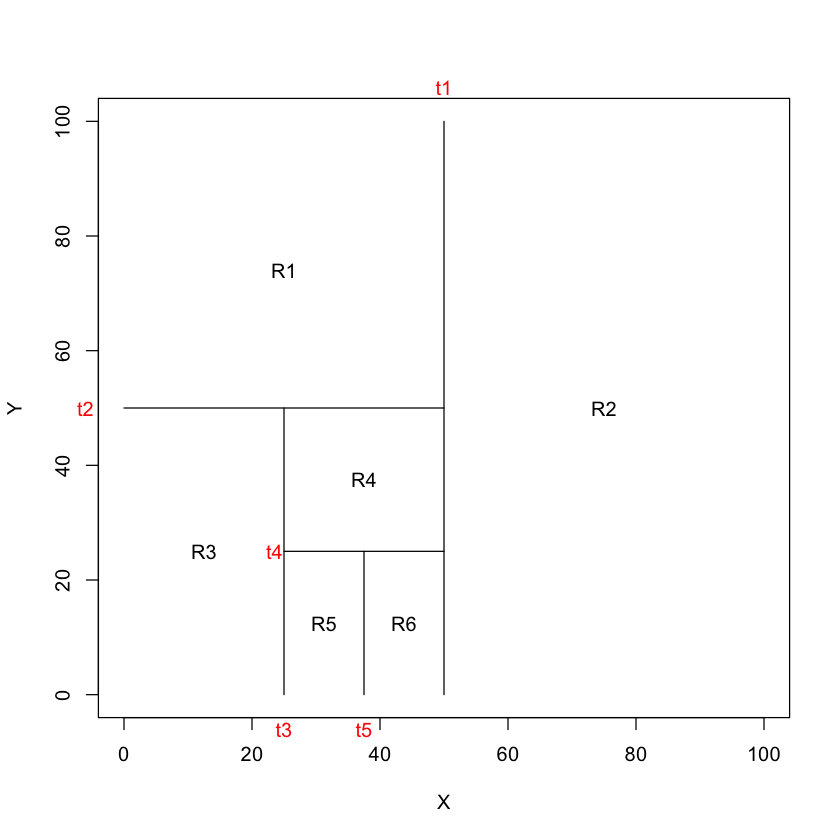

In [3]:
par(xpd = NA)
plot(NA, NA, type = "n", xlim = c(0,100), ylim = c(0,100), xlab = "X", ylab = "Y")
# t1: x = 40; (40, 0) (40, 100)
lines(x = c(50,50), y = c(0,100))
text(x = 50, y = 106, labels = c("t1"), col = "red")

lines(x = c(0,50), y = c(50,50))
text(x = -6, y = 50, labels = c("t2"), col = "red")

lines(y = c(0,50), x = c(25,25))
text(y = -6, x = 25, labels = c("t3"), col = "red")

lines(x = c(25,50), y = c(25,25))
text(x = 23.5, y = 25, labels = c("t4"), col = "red")

lines(y = c(0,25), x = c(37.5,37.5))
text(y = -6, x = 37.5, labels = c("t5"), col = "red")


text(x = 25, y = 74, labels = c("R1"))
text(x = 75, y = 50, labels = c("R2"))
text(x = 12.5, y = 25, labels = c("R3"))
text(x = 37.5, y = 37.5, labels = c("R4"))
text(x = 31.25, y = 12.5, labels = c("R5"))
text(x = 43.75, y = 12.5, labels = c("R6"))

        [  X<40 ] 
        |       |
    [Y<75]    [X<75]
    |   |     |    |
 [X<20] R2    R1   [Y<25]
 |    |            |    |
 R6   R5           R4   R3

## Q 8.4.2

0) f̂ (x) = 0,ri = yi

1) a) f̂ 1(x)=β11I(X1 < t1) + β01

1) b) f̂ (x)= λ f̂ 1(x)

1) c) ri = yi − λf̂ 1(xi)

To maximize the fit to the residuals, another distinct stump must be fit in the next and subsequent iterations will each fit Xj-distinct stumps. The following is the jth iteration, where b=j:


j) a) f̂ j(x) = β1jI(Xj<tj) + β0j

j) b) f̂ (x) = λf̂1(X1) + ⋯ + λf̂2(Xj) + ⋯ + f̂ pλz(Xp)

Since each iteration's fit is a distinct variable stump, there are only p fits based on “j) b)”.

# Q 8.4.2

In [4]:
x = c(0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75)

In [5]:
#vote approach
sum(x >= 0.5) > sum(x < 0.5)

[1] TRUE

In [6]:
# Since X > .5 > sum X<.5 the probibility is red.

In [7]:
#average approach
mean(x)

[1] 0.45

In [8]:
# because the average is less than .45 we cannot classify it as red, it is GREEN.

## Q 8.4.2

In [9]:
set.seed(1)
library(ISLR)
head(Default)

default,student,balance,income
No,No,729.5265,44361.625
No,Yes,817.1804,12106.135
No,No,1073.5492,31767.139
No,No,529.2506,35704.494
No,No,785.6559,38463.496
No,Yes,919.5885,7491.559


In [10]:
train = sample(nrow(Default), 2/3 * nrow(Default))
test = -train

In [11]:
glm.fit = glm(default ~ balance + income, data = Default[train, ], family = "binomial")
glm.probs = predict(glm.fit, newdata = Default[test, ], type = "response")
glm.pred = rep("No", length(glm.probs))
glm.pred[glm.probs > 0.5] = "Yes"
table(glm.pred, Default$default[test])

        
glm.pred   No  Yes
     No  3211   79
     Yes   14   30

In [12]:
mean(glm.pred != Default$default[test])

[1] 0.02789442

In [14]:
#install.packages("/Users/dacharya/Desktop/wsu/2nd_sem/DSA6100/R/gbm_2.1.3.tgz", repos = NULL, type="source")
#library(gbm)

In [15]:
##RANDOM FOREST
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [25]:
bag.default = randomForest(default ~ balance + income, data = Default, subset = train, 
    mtry = 2)
yhat.bag = predict(bag.default, newdata = Default[test, ])
table(yhat.bag, Default$default[test])

        
yhat.bag   No  Yes
     No  3186   79
     Yes   39   30

In [18]:
mean(yhat.bag != Default$default[test])

[1] 0.03539292